In [1]:
# %matplotlib widget
# import matplotlib
# import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle
# import numpy as np
# import pandas as pd
# import os
# from ipywidgets import Output
# import glob
# import statistics
# import math
# import datetime

Output()

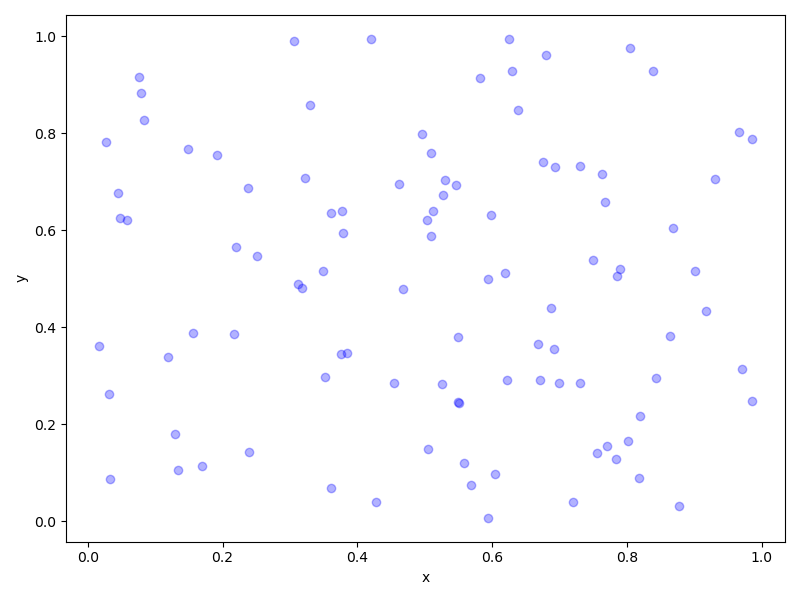

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Output
%matplotlib widget  

fig, ax = plt.subplots(figsize=(8, 6))
# ランダムデータを100個生成
x = list(np.random.random(100))
y = list(np.random.random(100))
df = pd.DataFrame({"x": x, "y": y})

scatter = ax.plot(x, y, "o", alpha=0.3, color="blue", zorder=0.1)

# グラフの設定
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.tight_layout()



filtered_indexes_list = []
mask = np.ones(len(df), dtype=bool)
mask[0 : len(df)] = False

out = Output()
display(out)

# ダブルクリック 1
# 右クリック 3
@out.capture(clear_output=True)
def on_click(event):
    ind = np.searchsorted(x, event.xdata)
    # 開始点
    if event.button == 3:
        plt.title("Selected")
        
        # とりあえずクリックされたら表示範囲の情報を得る
        x_min, x_max, y_min, y_max = plt.axis()  # グラフの現在の表示範囲を取得
        width = x_max - x_min  # 横幅
        height = y_max - y_min  # 縦幅
        x_clicked = event.xdata  # クリックしたx座標
        y_clicked = event.ydata  # クリックしたy座標
        
        # 挙動がわかりやすいようにprintしておきます。不要だったら消してください。
        print(f"(width): {width}")
        print(f"(height): {height}")
        print(f"(x_min): {x_min}")
        print(f"(x_max): {x_max}")
        print(f"(y_min): {y_min}")
        print(f"(y_max): {y_max}")
        print(f" onclick(x, y): ({x_clicked}, {y_clicked})")
        
        # x,yの表示範囲にあるデータのindexを取得
        x_indexes = [index for index, value in enumerate(x) if x_min <= value <= x_max]
        y_indexes = [index for index, value in enumerate(x) if y_min <= value <= y_max]
        
        selected_range_x = [x[i] for i in x_indexes]
        selected_range_y = [y[i] for i in y_indexes]
        
        # 表示範囲にあるx,yのデータ数
        print(len(selected_range_x))
        print(len(selected_range_y))
        
        # x, y座標が表示範囲内のデータを抽出
        condition_mask = (df["x"].between(x_min, x_max, inclusive=True)) & (df["y"].between(y_min, y_max, inclusive=True))
        filtered_indexes = df[condition_mask].index
        
        # 抽出したデータを赤い点で表示
        ax.plot(df["x"].iloc[filtered_indexes], df["y"].iloc[filtered_indexes], "o", color="red", alpha=0.9)
        fig.canvas.draw()
        
        # dfのfiltered_indexesのデータを保存
        filtered_indexes_list.append(filtered_indexes)

# ダブルクリックや右クリックのイベントをハンドリング
cid = fig.canvas.mpl_connect("button_press_event", on_click)
plt.show()

In [20]:
# 表示範囲のplotのindexがfiltered_indexes_listに格納される
filtered_indexes_list

[Int64Index([1, 5, 12, 43, 54, 64], dtype='int64')]

In [21]:
# 以下のコードでfiltered_indexes_listに格納されたindexのplotを見ることができる
# csvに保存するなりご自由に!
df.iloc[filtered_indexes_list[0]]

,x,y
1,0.032086,0.867644
5,0.092519,0.787503
12,0.072486,0.698286
43,0.104023,0.840615
54,0.018721,0.758276
64,0.040295,0.842779


Output()

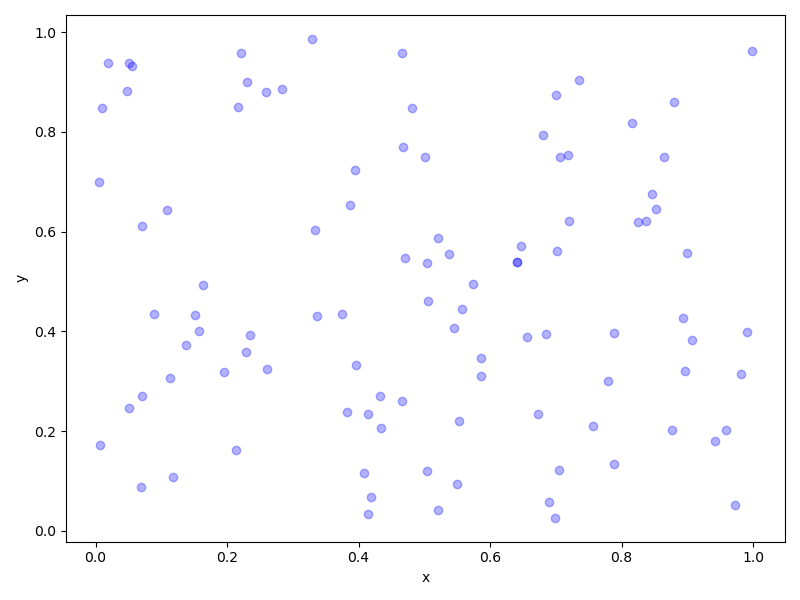

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Output
%matplotlib widget

# ランダムデータを生成
x = np.random.random(100)
y = np.random.random(100)
df = pd.DataFrame({"x": x, "y": y})

# グラフの初期化
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.plot(x, y, "o", alpha=0.3, color="blue", zorder=0.1)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.tight_layout()

# グラフ内のデータを選択するためのウィジェット
out = Output()
display(out)

# 選択されたデータのインデックスを格納するリスト
filtered_indexes_list = []

# イベントハンドラ関数
@out.capture(clear_output=True)
def on_click(event):
    if event.button == 3:  # 右クリック時の処理
        # グラフの表示範囲を取得
        x_min, x_max, y_min, y_max = plt.axis()
        width = x_max - x_min
        height = y_max - y_min
        x_clicked = event.xdata
        y_clicked = event.ydata
        
        # x, y座標が表示範囲内のデータを抽出
        condition_mask = (df["x"].between(x_min, x_max, inclusive=True)) & (df["y"].between(y_min, y_max, inclusive=True))
        filtered_indexes = df[condition_mask].index
        
        # 抽出したデータを赤い点で表示
        ax.plot(df["x"].iloc[filtered_indexes], df["y"].iloc[filtered_indexes], "o", color="red", alpha=0.3)
        fig.canvas.draw()
        
        # 選択されたデータのインデックスを保存
        filtered_indexes_list.append(filtered_indexes)

# ダブルクリックや右クリックのイベントをハンドリング
cid = fig.canvas.mpl_connect("button_press_event", on_click)
plt.show()


In [23]:
        print(f"(width): {width}")
        print(f"(height): {height}")
        print(f"(x_min): {x_min}")
        print(f"(x_max): {x_max}")
        print(f"(y_min): {y_min}")
        print(f"(y_max): {y_max}")
        print(f" onclick(x, y): ({x_clicked}, {y_clicked})")


NameError: name 'width' is not defined